# Interpretability

## Import Libraries

In [1]:
import os
from datetime import datetime
import pickle

import logging
import warnings
warnings.filterwarnings("ignore")

_ABSOLUTE_DIR = os.getcwd()
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
if not os.path.exists('logs'):
    # Create a new directory because it does not exist 
    os.makedirs('logs')
logging.basicConfig(filename=f'logs/heart_processing_{_NOTEBOOK_START}.log', encoding='utf-8', level=logging.DEBUG, format='%(levelname)s:%(asctime)s:%(message)s')

import tqdm as notebook_tqdm

import shap
import lime

import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
logging.info(f'Imports loaded')

## Import Data

In [2]:
## Models

with open(f'../artifacts/models/heart_svc_model_1.pickle', 'rb') as pickle_file:
    SVC_model_1 = pickle.load(pickle_file)

with open(f'../artifacts/models/heart_xgb_model_1.pickle', 'rb') as pickle_file:
    XGBoost_model_1 = pickle.load(pickle_file)


In [3]:
## Data

dfHeart_processed = pd.read_parquet(f'../artifacts/data/heart/heart_processed.parquet')
logging.info(f'Load dataset from ../artifacts/data/heart/heart_processed.parquet')

dfHeart_processed['diabetic_no_fe'] = dfHeart_processed['diabetic_no_fe'].astype(int)
dfHeart_processed['MentalHealth'] = dfHeart_processed['MentalHealth'].astype(int)
dfHeart_processed['PhysicalHealth'] = dfHeart_processed['PhysicalHealth'].astype(int)
dfHeart_processed['DiffWalking'] = dfHeart_processed['DiffWalking'].astype(int)
dfHeart_processed['Smoking'] = dfHeart_processed['Smoking'].astype(int)

columns_v1 = ['AgeCategory_seq_fe', 
              'BMI_scaled', 
              'GenHealth', 
              'Smoking', 
              'PriorDiseases', 
              'diabetic_no_fe', 
              'DiffWalking', 
              'MentalHealth', 
              'PhysicalHealth']

train_data = dfHeart_processed[(dfHeart_processed['Set'] == 'train')]
test_data = dfHeart_processed[(dfHeart_processed['Set'] == 'test')]
val_data = dfHeart_processed[(dfHeart_processed['Set'] == 'valid')]

X_train = train_data[columns_v1]
y_train = train_data['HeartDisease']

X_test = test_data[columns_v1]
y_test = test_data['HeartDisease']

X_val = val_data[columns_v1]
y_val = val_data['HeartDisease']

In [4]:
X_train.dtypes

AgeCategory_seq_fe      int64
BMI_scaled            float64
GenHealth               int64
Smoking                 int64
PriorDiseases           int64
diabetic_no_fe          int64
DiffWalking             int64
MentalHealth            int64
PhysicalHealth          int64
dtype: object

In [5]:
## Transformation Map

with open(f'../artifacts/transformation_maps/heart/bmi_scaler.pickle', 'rb') as pickle_file:
    StandardScaler_map = pickle.load(pickle_file)

## SHAP

In [6]:
test_x_set = X_test.sample(500, random_state = 42)

In [13]:
explainer_LinearSVC = shap.Explainer(SVC_model_1.predict, X_train)
shap_values_LinearSVC = explainer_LinearSVC(test_x_set)

Exact explainer: 501it [02:42,  2.94it/s]                         


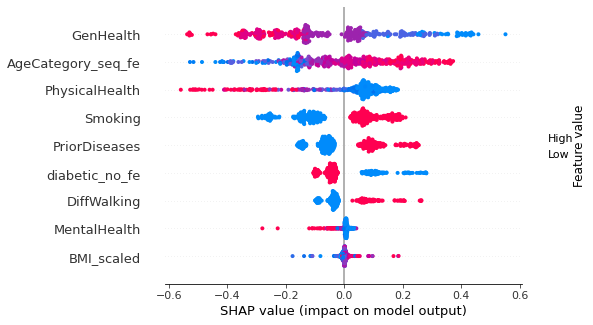

In [14]:
shap.summary_plot(shap_values_LinearSVC.values, test_x_set)

In [11]:
explainer_XGB = shap.Explainer(XGBoost_model_1.predict, X_train)
shap_values_XGB = explainer_XGB(test_x_set)


#explainer_XGB = shap.TreeExplainer(XGBoost_model_1.predict, X_train)
#shap_values_XGB = explainer_XGB(test_x_set)

Exact explainer: 501it [00:29, 11.35it/s]                         


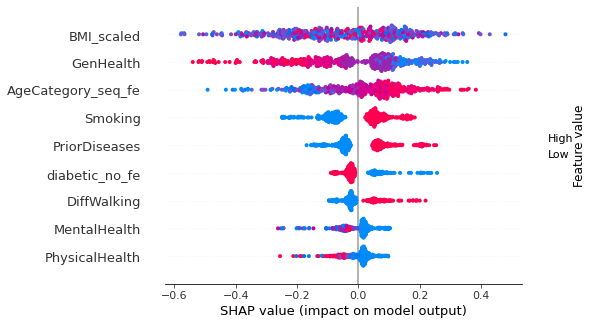

In [12]:
shap.summary_plot(shap_values_XGB.values, test_x_set)